In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astroquery import open_exoplanet_catalogue as oec
from astroquery.open_exoplanet_catalogue import findvalue

import rebound

In [2]:
# Catalog of exoplanets: http://openexoplanetcatalogue.com/systems/
star_name = 'KOI-142'
exoplanet_names = ['KOI-142 b', 'KOI-142 c']

In [3]:
cata = oec.get_catalogue()
star_data = cata.find(f".//star[name='{star_name}']")
exoplanets_data = []
for exoplanet_name in exoplanet_names:
    exoplanets_data.append(cata.find(f".//planet[name='{exoplanet_name}']"))

In [4]:
if len(exoplanets_data) > 0:
    # fields: https://github.com/OpenExoplanetCatalogue/open_exoplanet_catalogue/
    print('mass', findvalue(exoplanets_data[0], 'mass'))
    print('period', findvalue(exoplanets_data[0], 'period'))
    print('semimajoraxis', findvalue(exoplanets_data[0], 'semimajoraxis'))
    print('ascendingnode', findvalue(exoplanets_data[0], 'ascendingnode'))
    print('eccentricity', findvalue(exoplanets_data[0], 'eccentricity'))
    print('meananomaly', findvalue(exoplanets_data[0], 'meananomaly'))
    print('inclination', findvalue(exoplanets_data[0], 'inclination'))

mass 0.0055264 +/-0.0055264
period 10.9542 +0.00143 -6.4e-05
semimajoraxis 0.098
ascendingnode 270.0
eccentricity 0.0561 +0.00052 -0.00121
meananomaly None
inclination 0.931 +0.088 -0.079


In [5]:
def to_radians(value):
    if value==None:
        return 0
    return (value*u.deg).to(u.rad).value

def mjupiter_to_msun(mjupiter):
    if mjupiter==None:
        return 0
    return mjupiter*0.000950000000475

def day_to_year(day):
    if day==None:
        return 0
    return day/365

In [6]:
sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun')

In [7]:
sim.add(m=findvalue(star_data, 'mass'))

In [8]:
for exoplanet_data in exoplanets_data:
    # https://rebound.readthedocs.io/en/doctest/python_api.html#rebound.Orbit
    
    mass = mjupiter_to_msun(findvalue(exoplanet_data, 'mass')) or 0
    # P = day_to_year(findvalue(exoplanet_data, 'period')) or 0
    semi_major_axis = findvalue(exoplanet_data, 'semimajoraxis') or 0
    argument_of_periapsis = to_radians(findvalue(exoplanet_data, 'periastron')) or 0
    longitude_of_ascending_node = to_radians(findvalue(exoplanet_data, 'ascendingnode')) or 0
    eccentricity = findvalue(exoplanet_data, 'eccentricity') or 0
    f = findvalue(exoplanet_data, 'meananomaly') or 0
    inclination = to_radians(findvalue(exoplanet_data, 'inclination')) or 0
    
    sim.add(m=mass, a=semi_major_axis, e=eccentricity, omega=argument_of_periapsis, Omega=longitude_of_ascending_node, inc=inclination, f=f)
    
    print(findvalue(exoplanet_data, 'name'))

KOI-142 b
KOI-142 c


<Figure size 432x288 with 0 Axes>

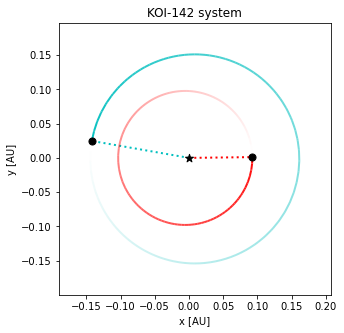

In [9]:
plt.figure()
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", periastron=True, color=True, lw=2)
plt.title(f"{star_name} system")
plt.show()

<Figure size 432x288 with 0 Axes>

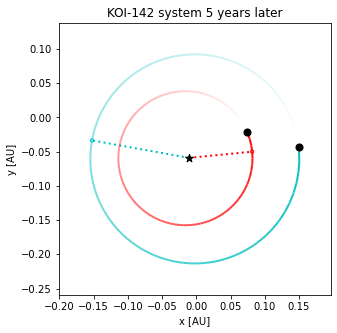

In [10]:
step_in_time = 5
sim.integrate(step_in_time)

plt.figure()
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", periastron=True, color=True, lw=2)
plt.title(f"{star_name} system {step_in_time} years later")
plt.show()